In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


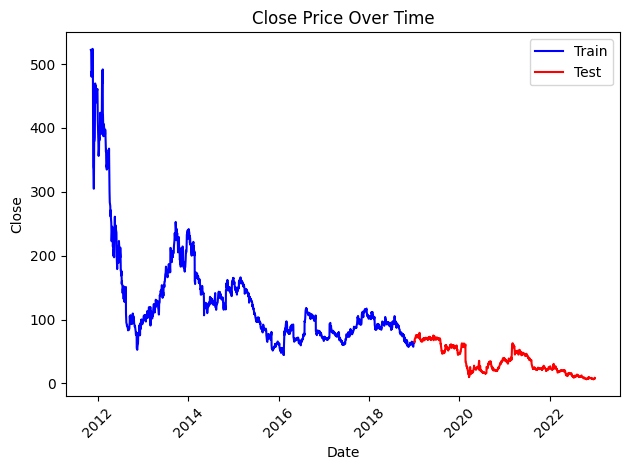

In [2]:
#AAPL
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GRPN',start_date,end_date,period,2019)
data.data_preprocess()

Running ring
Generation 1: Best fitness = 2.2182228949466802  Average Fitness = 0.18835153009017022
Generation 2: Best fitness = 2.2182228949466802  Average Fitness = 0.46061387564513573
Generation 3: Best fitness = 2.3793120992708765  Average Fitness = 0.6988581327532377
Generation 4: Best fitness = 2.3793120992708765  Average Fitness = 0.9076488069083771
Generation 5: Best fitness = 2.6642219433794483  Average Fitness = 1.0445213467573666
Generation 6: Best fitness = 2.6642219433794483  Average Fitness = 1.086537758455989
Generation 7: Best fitness = 2.665684725824681  Average Fitness = 1.2326640971092677
Generation 8: Best fitness = 3.069661435683556  Average Fitness = 1.3124096899732087
Generation 9: Best fitness = 3.5427894325331253  Average Fitness = 1.3640187927341885
Generation 10: Best fitness = 3.5427894325331253  Average Fitness = 1.3125404068426105
Generation 11: Best fitness = 3.5427894325331253  Average Fitness = 1.6126211249976778
Generation 12: Best fitness = 3.71906846

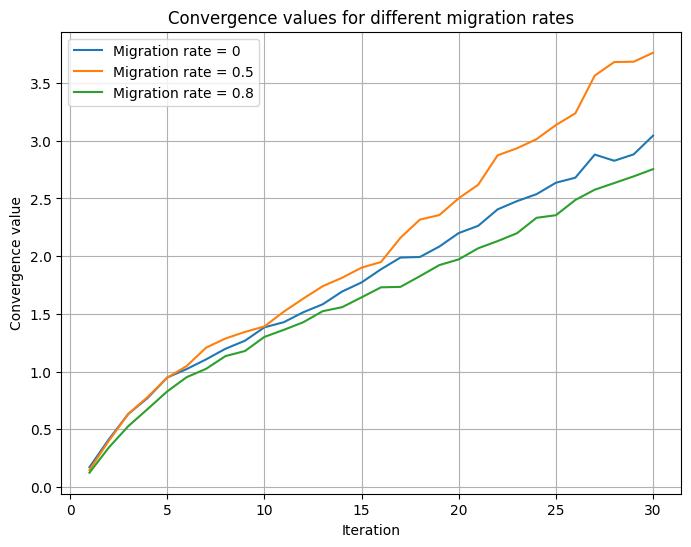

In [5]:

values = []
migration_rates = [0, 0.5 , 0.8]
num_runs = 10
convergence_values = []
for i in migration_rates:
    values = []
    for _ in range(num_runs):
        ga = IslandGGA(data=data.train_data,num_islands=8,m_iter= 5,num_iter=30,n_migrants_rate=i,pSize=100,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy="ring")
        ga.evolve()
        values.append(ga.convergence_values)
    convergence_values.append(np.mean(values, axis=0))  # Average convergence values across runs

# plot the convergence values for each crossover rate
plt.figure(figsize=(8, 6))
for i in range(len(migration_rates)):
    plt.plot(np.arange(1, 31), convergence_values[i], label='Migration rate = ' + str(migration_rates[i]))
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for different migration rates')
plt.legend()
plt.grid(True) 
plt.show()

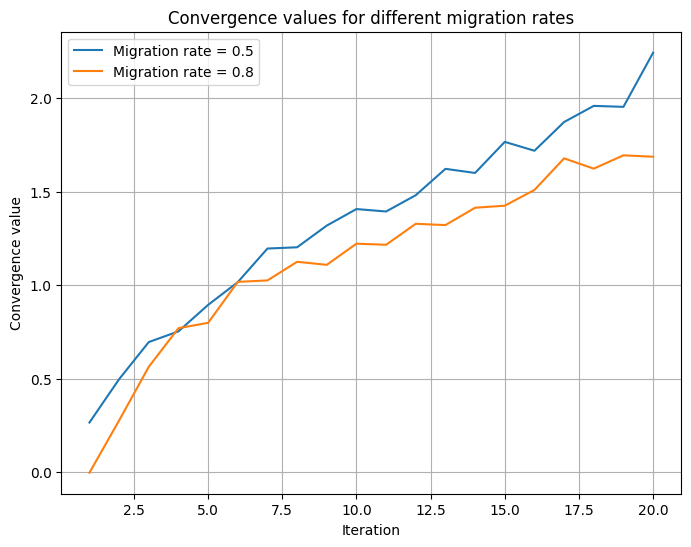

In [4]:
plt.figure(figsize=(8, 6))
for i in range(len(migration_rates)):
    plt.plot(np.arange(1, 21), convergence_values[i], label='Migration rate = ' + str(migration_rates[i]))
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for different migration rates')
plt.legend()
plt.grid(True) 
plt.show()

In [ ]:
print(ga.globalBest.binary_to_sltp())

In [ ]:
# Plot the convergence values for each evolutionary strategy
plt.figure(figsize=(8, 6))

plt.plot(np.arange(1, 21), ga.convergence_values, label='Proposed ')
plt.xlabel('Iteration')
plt.ylabel('Convergence value')
plt.title('Convergence values for Proposed Methods')
plt.legend()
plt.show()

In [ ]:


# Monthly returns for each strategy
monthly_returns = data.strategy_performance()


# Determine the grid dimensions
num_strategies = len(monthly_returns.columns)
grid_rows = int(num_strategies / 2)  # Number of rows in the grid
grid_cols = 2  # Number of columns in the grid

# Adjust the figure size based on the number of subplots
fig_width = 12
fig_height = 4 * grid_rows

# Create the subplots with the specified grid dimensions and figure size
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(fig_width, fig_height))

# Flatten the axes array if necessary
if grid_rows > 1:
    axes = axes.flatten()

# Iterate over each strategy and plot its cumulative profits
for idx, (strategy, returns) in enumerate(monthly_returns.iteritems()):
    cumulative_profits = np.cumprod(1 + returns)-1  # Calculate cumulative profits
    ax = axes[idx] if grid_rows > 1 else axes  # Select the correct subplot
    ax.plot(cumulative_profits)
    ax.set_xlabel('Month')
    ax.set_ylabel('Cumulative Profit')
    ax.set_title(f'Cumulative Profits for {strategy}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


